In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
from IPython.display import display
from scipy.stats import linregress

In [6]:
plt.rcParams['figure.figsize'] = (6,4)

In [7]:
def my_plot_fig(fig, filename_wo_extension):
    fig.tight_layout()
    for ext in ['png', 'pdf', 'svg']:
        kwargs = {}
        if ext == 'png':
            kwargs = {'facecolor': 'white'}
        fig.savefig(f"{filename_wo_extension}.{ext}", dpi=300, bbox_inches='tight', **kwargs)

# Data Stuff

## Raw Data

In [8]:
weak_alps_byte = """
Qubits,Memory / GiB,MPI Processes,Elapsed Time / s,Computation Time / s,Gate Operations,MPI time / s,GPU-GPU MPI Data / GiB,GPU-CPU Time / s,GPU-CPU Data / GiB, GPU-CPU Count
36,1026,1,119.80,103.57,41,0.00,0,11.43,1152,18
37,2052,2,147.12,113.69,42,3.10,640,23.42,2432,38
38,4104,4,144.63,111.44,43,5.09,960,22.14,2560,40
39,8208,8,167.19,120.13,44,13.29,1120,26.09,2816,44
40,16416,16,178.30,122.79,45,22.33,1264,27.20,2944,46
41,32832,32,183.92,119.91,46,28.79,1400,27.34,3200,50
42,65664,64,188.19,123.06,47,29.51,1532,29.43,3456,54
43,131328,128,209.97,132.62,48,35.51,1662,33.92,3712,58
44,262656,256,220.97,137.71,49,41.65,1791,33.58,3968,62
45,525312,512,222.84,135.70,50,44.74,1919,35.60,4224,66
46,1050624,1024,243.61,145.85,51,51.89,2047,37.71,4480,70
47,2101248,2048,257.90,157.23,52,52.73,2175,39.78,4736,74
48,4202496,4096,271.80,162.51,53,59.27,2303,41.88,4992,78
49,8404992,8192,290.60,167.19,54,75.18,2431,43.92,5248,82
"""
weak_jedi_byte = """
Qubits,Memory / GiB,MPI Processes,Elapsed Time / s,Computation Time / s,Gate Operations,MPI time / s,GPU-GPU MPI Data / GiB,GPU-CPU Time / s,GPU-CPU Data / GiB, GPU-CPU Count
36,1026,1,120.28,105.73,41,0.00,0,11.40,1152,18
37,2052,2,138.11,109.87,42,3.03,640,21.77,2432,38
38,4104,4,144.05,112.75,43,4.91,960,22.11,2560,40
39,8208,8,156.98,115.78,44,12.48,1120,24.21,2816,44
40,16416,16,169.53,118.45,45,21.18,1264,25.22,2944,46
41,32832,32,180.76,121.35,46,27.39,1400,27.33,3200,50
42,65664,64,187.96,124.71,47,29.20,1532,29.39,3456,54
43,131328,128,203.10,129.90,48,36.88,1662,31.43,3712,58
"""
weak_jedi_fp64 = """
Qubits,Memory / GiB,MPI Processes,Elapsed Time / s,Computation Time / s,Gate Operations,MPI time / s,GPU-GPU MPI Data / GiB,GPU-CPU Time / s,GPU-CPU Data / GiB, GPU-CPU Count
36,1040,8,49.21,10.29,41,12.54,1120,21.86,2816,44
37,2080,16,60.02,10.55,42,22.09,1264,22.79,2944,46
38,4160,32,69.42,10.85,43,29.22,1400,24.67,3200,50
39,8320,64,77.18,11.36,44,34.46,1532,26.58,3456,54
40,16640,128,95.05,11.22,45,50.48,1662,28.48,3712,58
"""
strong_jedi_byte = """
Qubits,Memory / GiB,MPI Processes,Elapsed Time / s,Computation Time / s,Gate Operations,MPI time / s,GPU-GPU MPI Data / GiB,GPU-CPU Time / s,GPU-CPU Data / GiB, GPU-CPU Count
38,4104,4,144.07,112.89,43,4.89,960,22.11,2560,40
38,4112,8,78.16,56.52,43,6.47,560,12.09,1408,44
38,4128,16,42.68,28.30,43,5.80,316,6.31,736,46
38,4160,32,23.56,13.79,43,4.38,175,3.41,400,50
38,4224,64,14.75,7.20,43,3.90,95,1.84,216,54
38,4352,128,8.55,3.64,43,2.04,51,0.98,116,58
"""

## Read In Data

In [9]:
_df_weak_alps = pd.read_csv(StringIO(weak_alps_byte)).set_index('Qubits')
_df_weak_alps['Scaling'] = 'Weak'
_df_weak_alps['System'] = 'Alps'
_df_weak_alps['Precision'] = 'Byte Encoding'
_df_weak_alps.head()

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            119.80                103.57   
37              2052              2            147.12                113.69   
38              4104              4            144.63                111.44   
39              8208              8            167.19                120.13   
40             16416             16            178.30                122.79   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.10                     640   
38                   43          5.09                     960   
39                   44         13.29                    1120   
40                   45         22.33                    1264   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 11.43                1152              18    Weak   Alps   
37                 23.42                2432              38    Weak   Alps   
38                 22.14                2560              40    Weak   Alps   
39                 26.09                2816              44    Weak   Alps   
40                 27.20                2944              46    Weak   Alps   

            Precision  
Qubits                 
36      Byte Encoding  
37      Byte Encoding  
38      Byte Encoding  
39      Byte Encoding  
40      Byte Encoding

In [10]:
_df_weak_jedi = pd.read_csv(StringIO(weak_jedi_byte)).set_index('Qubits')
_df_weak_jedi['Scaling'] = 'Weak'
_df_weak_jedi['System'] = 'JEDI'
_df_weak_jedi['Precision'] = 'Byte Encoding'
_df_weak_jedi

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            120.28                105.73   
37              2052              2            138.11                109.87   
38              4104              4            144.05                112.75   
39              8208              8            156.98                115.78   
40             16416             16            169.53                118.45   
41             32832             32            180.76                121.35   
42             65664             64            187.96                124.71   
43            131328            128            203.10                129.90   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.03                     640   
38                   43          4.91                     960   
39                   44         12.48                    1120   
40                   45         21.18                    1264   
41                   46         27.39                    1400   
42                   47         29.20                    1532   
43                   48         36.88                    1662   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 11.40                1152              18    Weak   JEDI   
37                 21.77                2432              38    Weak   JEDI   
38                 22.11                2560              40    Weak   JEDI   
39                 24.21                2816              44    Weak   JEDI   
40                 25.22                2944              46    Weak   JEDI   
41                 27.33                3200              50    Weak   JEDI   
42                 29.39                3456              54    Weak   JEDI   
43                 31.43                3712              58    Weak   JEDI   

            Precision  
Qubits                 
36      Byte Encoding  
37      Byte Encoding  
38      Byte Encoding  
39      Byte Encoding  
40      Byte Encoding  
41      Byte Encoding  
42      Byte Encoding  
43      Byte Encoding

In [11]:
_df_weak_jedi_fp64 = pd.read_csv(StringIO(weak_jedi_fp64)).set_index('Qubits')
_df_weak_jedi_fp64['Scaling'] = 'Weak'
_df_weak_jedi_fp64['System'] = 'JEDI'
_df_weak_jedi_fp64['Precision'] = 'FP64'
_df_weak_jedi_fp64

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1040              8             49.21                 10.29   
37              2080             16             60.02                 10.55   
38              4160             32             69.42                 10.85   
39              8320             64             77.18                 11.36   
40             16640            128             95.05                 11.22   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41         12.54                    1120   
37                   42         22.09                    1264   
38                   43         29.22                    1400   
39                   44         34.46                    1532   
40                   45         50.48                    1662   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 21.86                2816              44    Weak   JEDI   
37                 22.79                2944              46    Weak   JEDI   
38                 24.67                3200              50    Weak   JEDI   
39                 26.58                3456              54    Weak   JEDI   
40                 28.48                3712              58    Weak   JEDI   

       Precision  
Qubits            
36          FP64  
37          FP64  
38          FP64  
39          FP64  
40          FP64

In [12]:
_df_strong_jedi_byte = pd.read_csv(StringIO(strong_jedi_byte)).set_index('Qubits')
_df_strong_jedi_byte['Scaling'] = 'Strong'
_df_strong_jedi_byte['System'] = 'JEDI'
_df_strong_jedi_byte['Precision'] = 'Byte Encoding'
_df_strong_jedi_byte

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
38              4104              4            144.07                112.89   
38              4112              8             78.16                 56.52   
38              4128             16             42.68                 28.30   
38              4160             32             23.56                 13.79   
38              4224             64             14.75                  7.20   
38              4352            128              8.55                  3.64   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
38                   43          4.89                     960   
38                   43          6.47                     560   
38                   43          5.80                     316   
38                   43          4.38                     175   
38                   43          3.90                      95   
38                   43          2.04                      51   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
38                 22.11                2560              40  Strong   JEDI   
38                 12.09                1408              44  Strong   JEDI   
38                  6.31                 736              46  Strong   JEDI   
38                  3.41                 400              50  Strong   JEDI   
38                  1.84                 216              54  Strong   JEDI   
38                  0.98                 116              58  Strong   JEDI   

            Precision  
Qubits                 
38      Byte Encoding  
38      Byte Encoding  
38      Byte Encoding  
38      Byte Encoding  
38      Byte Encoding  
38      Byte Encoding

## Combine Data into one Frame

In [13]:
df = pd.concat([
    _df_weak_alps,
    _df_weak_jedi,
    _df_weak_jedi_fp64,
    _df_strong_jedi_byte
])
df

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            119.80                103.57   
37              2052              2            147.12                113.69   
38              4104              4            144.63                111.44   
39              8208              8            167.19                120.13   
40             16416             16            178.30                122.79   
41             32832             32            183.92                119.91   
42             65664             64            188.19                123.06   
43            131328            128            209.97                132.62   
44            262656            256            220.97                137.71   
45            525312            512            222.84                135.70   
46           1050624           1024            243.61                145.85   
47           2101248           2048            257.90                157.23   
48           4202496           4096            271.80                162.51   
49           8404992           8192            290.60                167.19   
36              1026              1            120.28                105.73   
37              2052              2            138.11                109.87   
38              4104              4            144.05                112.75   
39              8208              8            156.98                115.78   
40             16416             16            169.53                118.45   
41             32832             32            180.76                121.35   
42             65664             64            187.96                124.71   
43            131328            128            203.10                129.90   
36              1040              8             49.21                 10.29   
37              2080             16             60.02                 10.55   
38              4160             32             69.42                 10.85   
39              8320             64             77.18                 11.36   
40             16640            128             95.05                 11.22   
38              4104              4            144.07                112.89   
38              4112              8             78.16                 56.52   
38              4128             16             42.68                 28.30   
38              4160             32             23.56                 13.79   
38              4224             64             14.75                  7.20   
38              4352            128              8.55                  3.64   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.10                     640   
38                   43          5.09                     960   
39                   44         13.29                    1120   
40                   45         22.33                    1264   
41                   46         28.79                    1400   
42                   47         29.51                    1532   
43                   48         35.51                    1662   
44                   49         41.65                    1791   
45                   50         44.74                    1919   
46                   51         51.89                    2047   
47                   52         52.73                    2175   
48                   53         59.27                    2303   
49                   54         75.18                    2431   
36                   41          0.00                       0   
37                   42          3.03                     640   
38                   43          4.91                     960   
39     

# Plots

## Internode Bandwidth

In [14]:
df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), 'MPI Bandwidth / GiB/s'] = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), "GPU-GPU MPI Data / GiB"] / df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), 'MPI time / s']

In [15]:
df.head()

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            119.80                103.57   
37              2052              2            147.12                113.69   
38              4104              4            144.63                111.44   
39              8208              8            167.19                120.13   
40             16416             16            178.30                122.79   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.10                     640   
38                   43          5.09                     960   
39                   44         13.29                    1120   
40                   45         22.33                    1264   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 11.43                1152              18    Weak   Alps   
37                 23.42                2432              38    Weak   Alps   
38                 22.14                2560              40    Weak   Alps   
39                 26.09                2816              44    Weak   Alps   
40                 27.20                2944              46    Weak   Alps   

            Precision  MPI Bandwidth / GiB/s  
Qubits                                        
36      Byte Encoding                    NaN  
37      Byte Encoding             206.451613  
38      Byte Encoding             188.605108  
39      Byte Encoding              84.273890  
40      Byte Encoding              56.605464

In [16]:
df.loc[df['System'] == 'Alps', 'MPI Bandwidth / GiB/s']

Qubits
36           NaN
37    206.451613
38    188.605108
39     84.273890
40     56.605464
41     48.627996
42     51.914605
43     46.803717
44     43.001200
45     42.892266
46     39.448834
47     41.247866
48     38.856082
49     32.335728
Name: MPI Bandwidth / GiB/s, dtype: float64

In [17]:
df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'MPI time / s'].dropna().index

NameError: name 'df_weak_byte' is not defined

In [18]:
linreq_jedi_mpitime = linregress(
    df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'MPI time / s'].dropna().index, 
    df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'MPI time / s'].dropna().values 
)

NameError: name 'df_weak_byte' is not defined

In [19]:
linreq_jedi_mpitime.slope+linreq_jedi_mpitime.stderr*50

NameError: name 'linreq_jedi_mpitime' is not defined

NameError: name 'df_weak_byte' is not defined

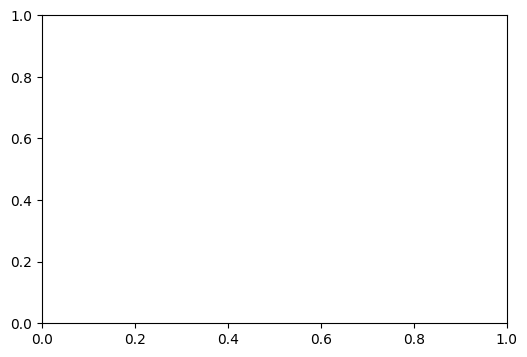

In [20]:
fig, ax = plt.subplots()
ax = df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'MPI time / s'].plot(ax=ax, style='v-')
ax.plot(df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'MPI time / s'].dropna().index, linreq_jedi_mpitime.intercept + linreq_jedi_mpitime.slope * df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'MPI time / s'].dropna().index, "C1", marker='v', label='JEDI')
ax.plot(jupiter_qubits, linreq_jedi_mpitime.intercept + linreq_jedi_mpitime.slope * jupiter_qubits, "C1", marker='^', linestyle='dashed', label='JUPITER (expected)')
_entries = np.concatenate((df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'MPI time / s'].dropna().index,jupiter_qubits))
ax.fill_between(
    _entries, 
    (linreq_jedi_mpitime.intercept) + (linreq_jedi_mpitime.slope-linreq_jedi_mpitime.stderr) * _entries, 
    (linreq_jedi_mpitime.intercept) + (linreq_jedi_mpitime.slope+linreq_jedi_mpitime.stderr) * _entries,
    alpha=0.3
)

In [21]:
bw_fit_alps = linregress(df.loc[df['System'] == 'Alps', 'MPI Bandwidth / GiB/s'].index[7:-1], df.loc[df['System'] == 'Alps', 'MPI Bandwidth / GiB/s'].values[7:-1])

In [22]:
bw_fit_alps

LinregressResult(slope=np.float64(-1.3840459704597274), intercept=np.float64(105.01575283391821), rvalue=np.float64(-0.8952949034355054), pvalue=np.float64(0.01587078665079274), stderr=np.float64(0.3443314691506169), intercept_stderr=np.float64(15.678114227021933))

In [54]:
_df_filter = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')]
_df_filter

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            119.80                103.57   
37              2052              2            147.12                113.69   
38              4104              4            144.63                111.44   
39              8208              8            167.19                120.13   
40             16416             16            178.30                122.79   
41             32832             32            183.92                119.91   
42             65664             64            188.19                123.06   
43            131328            128            209.97                132.62   
44            262656            256            220.97                137.71   
45            525312            512            222.84                135.70   
46           1050624           1024            243.61                145.85   
47           2101248           2048            257.90                157.23   
48           4202496           4096            271.80                162.51   
49           8404992           8192            290.60                167.19   
36              1026              1            120.28                105.73   
37              2052              2            138.11                109.87   
38              4104              4            144.05                112.75   
39              8208              8            156.98                115.78   
40             16416             16            169.53                118.45   
41             32832             32            180.76                121.35   
42             65664             64            187.96                124.71   
43            131328            128            203.10                129.90   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.10                     640   
38                   43          5.09                     960   
39                   44         13.29                    1120   
40                   45         22.33                    1264   
41                   46         28.79                    1400   
42                   47         29.51                    1532   
43                   48         35.51                    1662   
44                   49         41.65                    1791   
45                   50         44.74                    1919   
46                   51         51.89                    2047   
47                   52         52.73                    2175   
48                   53         59.27                    2303   
49                   54         75.18                    2431   
36                   41          0.00                       0   
37                   42          3.03                     640   
38                   43          4.91                     960   
39                   44         12.48                    1120   
40                   45         21.18                    1264   
41                   46         27.39                    1400   
42                   47         29.20                    1532   
43                   48         36.88                    1662   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 11.43                1152              18    Weak   Alps   
37                 23.42                2432              38    Weak   Alps   
38                 22.14                2560              40    Weak   Alps   
39                 26.09                2816              44    Weak   Alps   
40                 27.20                2944              46    Weak   Alps 

In [24]:
# all of this is unused and was just me testing how to create a secondary x axis at the top more efficiently
#def qubit2process(qubits):
#    return _df_filter.pivot_table(index=["MPI Processes"], columns="System", values='MPI Bandwidth / GiB/s').index
#def process2qubit(processes):
#    return _df_filter.pivot_table(index=["Qubits"], columns="System", values='MPI Bandwidth / GiB/s').index
#def qubit2process_v(qubits):
#    vec_lookup = np.vectorize(lambda x: qubits_processes.get(x, 1))
#    print(qubits)
#    return vec_lookup(qubits)
#def process2qubit_v(processes):
#    vec_lookup = np.vectorize(lambda x: processes_qubits.get(x, 1))
#    print(qubits)
#    return vec_lookup(processes)
#np_qubits_processes = np.array(list(qubits_processes.items()), dtype=[('qubit', 'i4'), ('process', 'i4')])
#np_processes_qubits = np.array(list(processes_qubits.items()), dtype=[('process', 'i4'), ('qubit', 'i4')])

In [25]:
qubits = _df_filter.pivot_table(index=["Qubits"], columns="System", values='MPI Bandwidth / GiB/s').index
processes = _df_filter.pivot_table(index=["MPI Processes"], columns="System", values='MPI Bandwidth / GiB/s').index

In [26]:
qubits_processes = {36: 1} | {qubit: process for qubit, process in zip(qubits, processes)}
processes_qubits = {1: 36} | {process: qubit for qubit, process in zip(qubits, processes)}

In [27]:
jupiter_qubits = np.array([43, 44, 45, 46, 47, 48, 49, 50])

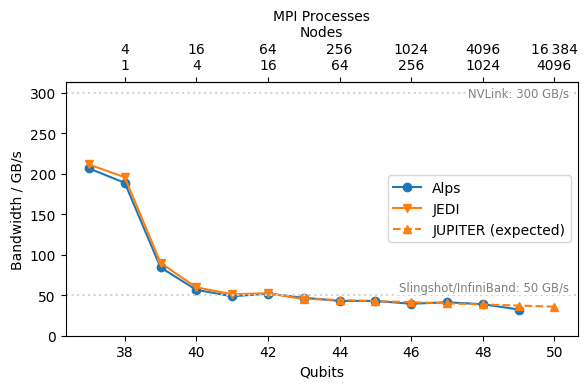

In [58]:
fig, ax = plt.subplots()
ax = _df_filter.pivot_table(index=["Qubits"], columns="System", values='MPI Bandwidth / GiB/s').plot(style=['o-','v-'], ax=ax)
ax.plot(jupiter_qubits, bw_fit_alps.intercept + bw_fit_alps.slope * jupiter_qubits, "C1", marker='^', linestyle='dashed', label='JUPITER (expected)')
ax.axhline(2*150, linestyle='dotted', color='lightgray') # TODO find out if GiB/s or GB/s
ax.text(ax.get_xlim()[1]*0.995, 2*150, f'NVLink: 300 GB/s', va='center', ha='right', fontsize='small', color='gray', bbox=dict(boxstyle='square,pad=0.15', fc='white', ec='none'))
ax.axhline(2*200/8, linestyle='dotted', color='lightgray') # TODO find out if GiB/s or GB/s
ax.text(ax.get_xlim()[1]*0.995, 2*200/8 * 1.2, f'Slingshot/InfiniBand: 50 GB/s', va='center', ha='right', fontsize='small', color='gray', bbox=dict(boxstyle='square,pad=0.15', fc='white', ec='none'))
#_df_filter_pivot.pivot_table(index=["MPI Processes"], columns="System", values='MPI Bandwidth / GiB/s').plot(ax=ax_up)
#ax.set_xlim((36, 52))
#ax_up = ax.twiny()
#ax_up.set_xlim(ax.get_xlim())
#ax_up.set_xticks(ax.get_xticks())
#ax_up.set_xticklabels(ax.get_xticklabels())
#ax_up.set_xlabel('Memory / GB')
#ax_up.set_xlabel('Memory / GB')
#ax.set_xlabel('Number of Qubits')
#ax2 = ax.twiny()
#ax2.set_xticks(ax.get_xticks())
##ax2.set_xbound(ax.get_xbound())
#ax_up.set_xticklabels(_df_filter_pivot.pivot_table(index=["MPI Processes"], columns="System", values='MPI Bandwidth / GiB/s').index)
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticks(_df_filter_pivot.index)
#ax2.set_xticklabels(_df_filter_pivot['MPI Processes'])
#ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")
secax = ax.secondary_xaxis('top')
secax.set_xticks(ax.get_xticks())
secax.set_xticklabels(
    [None] + # no clue why I need to pad this
    ['{mpi}\n{nodes}'.format(mpi=qubits_processes[int(lab.get_text())], nodes=int(qubits_processes[int(lab.get_text())]/4)) for lab in ax.get_xticklabels()[1:-2]] + 
    ['16 384\n4096'] +
    [None]
)
ax.legend()
secax.set_xlabel("MPI Processes\nNodes")
ax.set_ylabel('Bandwidth / GB/s');
ax.set_aspect('auto')
ax.set_ylim(bottom=0)
#ax.set_xticks([34., 36., 38., 40., 42., 44., 46., 48., 50., 52.])
ax.apply_aspect()
my_plot_fig(fig, 'alps-jedi--bw-vs-qubits')

array([36., 38., 40., 42., 44., 46., 48., 50., 52.])

## Weak Scaling

In [29]:
_df_tmp = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')]
_df_tmp.head()

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            119.80                103.57   
37              2052              2            147.12                113.69   
38              4104              4            144.63                111.44   
39              8208              8            167.19                120.13   
40             16416             16            178.30                122.79   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.10                     640   
38                   43          5.09                     960   
39                   44         13.29                    1120   
40                   45         22.33                    1264   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 11.43                1152              18    Weak   Alps   
37                 23.42                2432              38    Weak   Alps   
38                 22.14                2560              40    Weak   Alps   
39                 26.09                2816              44    Weak   Alps   
40                 27.20                2944              46    Weak   Alps   

            Precision  MPI Bandwidth / GiB/s  
Qubits                                        
36      Byte Encoding                    NaN  
37      Byte Encoding             206.451613  
38      Byte Encoding             188.605108  
39      Byte Encoding              84.273890  
40      Byte Encoding              56.605464

In [30]:
_df_tmp.head()

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            119.80                103.57   
37              2052              2            147.12                113.69   
38              4104              4            144.63                111.44   
39              8208              8            167.19                120.13   
40             16416             16            178.30                122.79   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.10                     640   
38                   43          5.09                     960   
39                   44         13.29                    1120   
40                   45         22.33                    1264   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 11.43                1152              18    Weak   Alps   
37                 23.42                2432              38    Weak   Alps   
38                 22.14                2560              40    Weak   Alps   
39                 26.09                2816              44    Weak   Alps   
40                 27.20                2944              46    Weak   Alps   

            Precision  MPI Bandwidth / GiB/s  
Qubits                                        
36      Byte Encoding                    NaN  
37      Byte Encoding             206.451613  
38      Byte Encoding             188.605108  
39      Byte Encoding              84.273890  
40      Byte Encoding              56.605464

### Time per Operation

In [31]:
df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), 'Elapsed Time per Gate Operation / s'] = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), 'Elapsed Time / s'] / df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), 'Gate Operations']
df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), 'Computation Time per Gate Operation / s'] = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), 'Computation Time / s'] / df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding'), 'Gate Operations']

In [32]:
df.loc[(df["System"] == 'JEDI') & (df['Scaling'] == 'Weak'), 'Elapsed Time per Gate Operation / s'].dropna()

Qubits
36    2.933659
37    3.288333
38    3.350000
39    3.567727
40    3.767333
41    3.929565
42    3.999149
43    4.231250
Name: Elapsed Time per Gate Operation / s, dtype: float64

In [33]:
reg_etperop = linregress(df.loc[(df["System"] == 'JEDI') & (df['Scaling'] == 'Weak'), 'Elapsed Time per Gate Operation / s'].dropna().index, df.loc[(df["System"] == 'JEDI') & (df['Scaling'] == 'Weak'), 'Elapsed Time per Gate Operation / s'].dropna().values)
reg_ctperop = linregress(df.loc[(df["System"] == 'JEDI') & (df['Scaling'] == 'Weak'), 'Computation Time per Gate Operation / s'].dropna().index, df.loc[(df["System"] == 'JEDI') & (df['Scaling'] == 'Weak'), 'Computation Time per Gate Operation / s'].dropna().values)

In [34]:
from matplotlib.legend_handler import HandlerTuple
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [35]:
ax.get_legend().get_texts()[0].get_text()

'Alps'

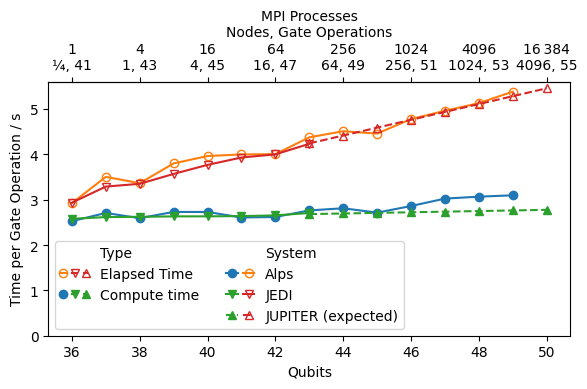

In [55]:
fig, ax = plt.subplots()
ax = df[df["System"] == 'Alps'].pivot_table(index="Qubits", columns="System", values=["Elapsed Time per Gate Operation / s", "Computation Time per Gate Operation / s"]).plot(ax=ax, style=['o-', 'o-'])
ax = df[df["System"] == 'JEDI'].pivot_table(index="Qubits", columns="System", values=["Elapsed Time per Gate Operation / s", "Computation Time per Gate Operation / s"]).plot(ax=ax, style=['v-', 'v-'])
ax.plot(jupiter_qubits, reg_ctperop.intercept + reg_ctperop.slope * jupiter_qubits, "C2", marker='^', linestyle='dashed', label='JUPITER (expected)')
ax.plot(jupiter_qubits, reg_etperop.intercept + reg_etperop.slope * jupiter_qubits, "C3", marker='^', linestyle='dashed', label='JUPITER (expected)')
for i, line in enumerate(ax.get_lines()):
    if i % 2:
        line.set_fillstyle('none')
ax.set_ylim(bottom=0)
#ax.legend(
#    [(ax.get_lines()[0], ax.get_lines()[1]), (ax.get_lines()[2], ax.get_lines()[3])],
#    ['Alps', 'JEDI'],
#    handler_map={tuple: HandlerTuple(ndivide=None)}
#)
type_patch = Patch(color='none', label='Type')
sys_patch = Patch(color='none', label='System')
empty = Patch(color='none', label='empty')
ax.legend(
    [
        type_patch, (ax.get_lines()[1], ax.get_lines()[3], ax.get_lines()[5]), (ax.get_lines()[0], ax.get_lines()[2], ax.get_lines()[4]),
        empty,
        sys_patch, (ax.get_lines()[0], ax.get_lines()[1]), (ax.get_lines()[2], ax.get_lines()[3]), (ax.get_lines()[4], ax.get_lines()[5]),
    ],
    [
        'Type', 'Elapsed Time', 'Compute time', '',
        'System', 'Alps', 'JEDI', 'JUPITER (expected)',
    ],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    ncol=2
)
#for leg in ax.get_legend().get_texts():
#    if 'Type' in leg.get_text() or 'System' in leg.get_text():
#        leg.set_weight('semibold')
ax.set_ylabel('Time per Gate Operation / s')
secax = ax.secondary_xaxis('top')
secax.set_xticks(ax.get_xticks())
secax.set_xticklabels(
    [None] + # no clue why I need to pad this
    ['{mpi}\n{nodes}, {gates}'.format(mpi=qubits_processes[int(lab.get_text())], nodes=int(qubits_processes[int(lab.get_text())]/4), gates=df[(df["System"] == 'Alps') & (df['Scaling'] == 'Weak')]['Gate Operations'][int(lab.get_text())]) for lab in ax.get_xticklabels()[1:-2]] + 
    ['16 384\n4096, 55'] +
    [None]
)
_new_labels=secax.get_xticklabels()
for label in _new_labels:
    if '41' in label.get_text():
        label.set_text(label.get_text().replace('0', '¼'))
secax.set_xticklabels(_new_labels)
secax.set_xlabel('MPI Processes\nNodes, Gate Operations')
my_plot_fig(fig, 'alps-jedi--time-per-gate-op--elapsed-time-compute-time')

In [56]:
ax.get_xticks()

array([34., 36., 38., 40., 42., 44., 46., 48., 50., 52.])

### Elapsed Time

In [55]:
df_weak = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')].pivot_table(index="Qubits", columns="System", values=["Elapsed Time / s", "Computation Time / s"])

In [56]:
df_weak

Computation Time / s         Elapsed Time / s        
System                 Alps    JEDI             Alps    JEDI
Qubits                                                      
36                   103.57  105.73           119.80  120.28
37                   113.69  109.87           147.12  138.11
38                   111.44  112.75           144.63  144.05
39                   120.13  115.78           167.19  156.98
40                   122.79  118.45           178.30  169.53
41                   119.91  121.35           183.92  180.76
42                   123.06  124.71           188.19  187.96
43                   132.62  129.90           209.97  203.10
44                   137.71     NaN           220.97     NaN
45                   135.70     NaN           222.84     NaN
46                   145.85     NaN           243.61     NaN
47                   157.23     NaN           257.90     NaN
48                   162.51     NaN           271.80     NaN
49                   167.19     NaN           290.60     NaN

<Axes: xlabel='Qubits'>

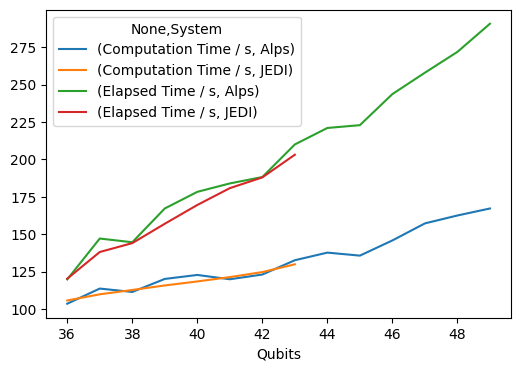

In [57]:
df_weak.plot()

### All Timings

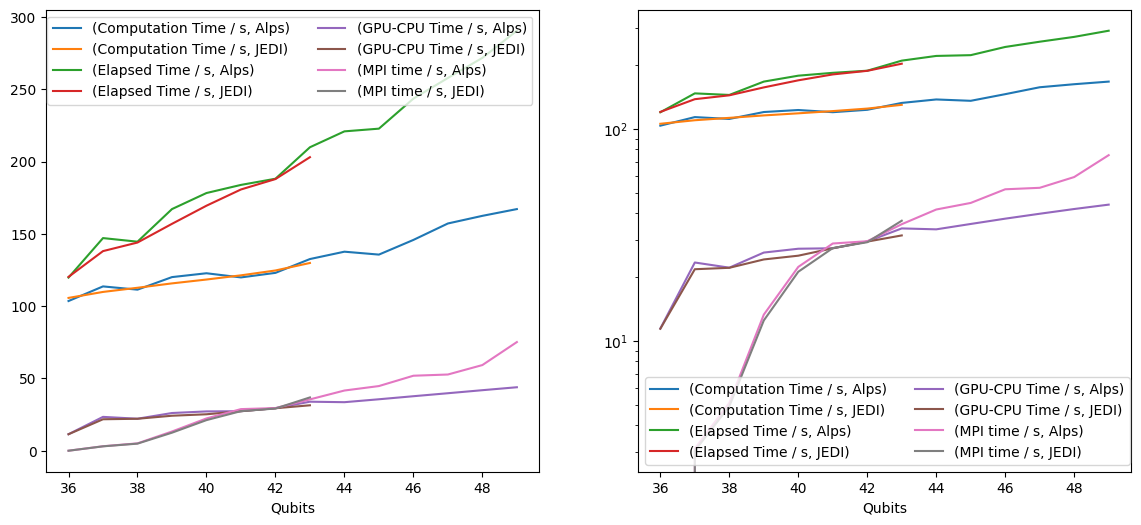

In [58]:
fig, [ax_left, ax_right] = plt.subplots(ncols=2, figsize=(14,6))
#ax = sns.lineplot(df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')], x="Qubits", y="Elapsed Time / s", hue='System')
#sns.lineplot(df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')], x="Qubits", y="Computation Time / s", hue='System', ax=ax)
ax_left = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')].pivot_table(index="Qubits", columns="System", values=["Elapsed Time / s", "Computation Time / s", "MPI time / s", "GPU-CPU Time / s"]).plot(ax=ax_left)
ax_right = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')].pivot_table(index="Qubits", columns="System", values=["Elapsed Time / s", "Computation Time / s", "MPI time / s", "GPU-CPU Time / s"]).plot(logy=True, ax=ax_right)
ax_left.legend(ncols=2)
ax_right.legend(ncols=2)

### Efficiency

In [59]:
df_weak_byte = df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')].copy()
df_weak_byte

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            119.80                103.57   
37              2052              2            147.12                113.69   
38              4104              4            144.63                111.44   
39              8208              8            167.19                120.13   
40             16416             16            178.30                122.79   
41             32832             32            183.92                119.91   
42             65664             64            188.19                123.06   
43            131328            128            209.97                132.62   
44            262656            256            220.97                137.71   
45            525312            512            222.84                135.70   
46           1050624           1024            243.61                145.85   
47           2101248           2048            257.90                157.23   
48           4202496           4096            271.80                162.51   
49           8404992           8192            290.60                167.19   
36              1026              1            120.28                105.73   
37              2052              2            138.11                109.87   
38              4104              4            144.05                112.75   
39              8208              8            156.98                115.78   
40             16416             16            169.53                118.45   
41             32832             32            180.76                121.35   
42             65664             64            187.96                124.71   
43            131328            128            203.10                129.90   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.10                     640   
38                   43          5.09                     960   
39                   44         13.29                    1120   
40                   45         22.33                    1264   
41                   46         28.79                    1400   
42                   47         29.51                    1532   
43                   48         35.51                    1662   
44                   49         41.65                    1791   
45                   50         44.74                    1919   
46                   51         51.89                    2047   
47                   52         52.73                    2175   
48                   53         59.27                    2303   
49                   54         75.18                    2431   
36                   41          0.00                       0   
37                   42          3.03                     640   
38                   43          4.91                     960   
39                   44         12.48                    1120   
40                   45         21.18                    1264   
41                   46         27.39                    1400   
42                   47         29.20                    1532   
43                   48         36.88                    1662   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 11.43                1152              18    Weak   Alps   
37                 23.42                2432              38    Weak   Alps   
38                 22.14                2560              40    Weak   Alps   
39                 26.09                2816              44    Weak   Alps   
40                 27.20                2944              46    Weak   Alps 

In [60]:
#For instance, elapsed time (N qubits, normalized to 36 qubits) = elapsed time (from table) * gate operation (36 qubits, from table) / gate operation (N qubits, from table), like you “almost” did in the efficiency plot.
for sys in ['Alps', 'JEDI']:
    for quantity in ['Elapsed Time', 'Computation Time']:
        df_weak_byte.loc[df_weak_byte['System'] == sys, f'{quantity} (norm Gate Ops)/ s'] = df_weak_byte.loc[df_weak_byte['System'] == sys, f'{quantity} / s'] * df_weak_byte.loc[df_weak_byte['System'] == sys, 'Gate Operations'].iloc[0] / df_weak_byte.loc[df_weak_byte['System'] == sys, 'Gate Operations']
df_weak_byte.head()

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
36              1026              1            119.80                103.57   
37              2052              2            147.12                113.69   
38              4104              4            144.63                111.44   
39              8208              8            167.19                120.13   
40             16416             16            178.30                122.79   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
36                   41          0.00                       0   
37                   42          3.10                     640   
38                   43          5.09                     960   
39                   44         13.29                    1120   
40                   45         22.33                    1264   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
36                 11.43                1152              18    Weak   Alps   
37                 23.42                2432              38    Weak   Alps   
38                 22.14                2560              40    Weak   Alps   
39                 26.09                2816              44    Weak   Alps   
40                 27.20                2944              46    Weak   Alps   

            Precision  MPI Bandwidth / GiB/s  \
Qubits                                         
36      Byte Encoding                    NaN   
37      Byte Encoding             206.451613   
38      Byte Encoding             188.605108   
39      Byte Encoding              84.273890   
40      Byte Encoding              56.605464   

        Elapsed Time per Gate Operation / s  \
Qubits                                        
36                                 2.921951   
37                                 3.502857   
38                                 3.363488   
39                                 3.799773   
40                                 3.962222   

        Computation Time per Gate Operation / s  \
Qubits                                            
36                                     2.526098   
37                                     2.706905   
38                                     2.591628   
39                                     2.730227   
40                                     2.728667   

        Elapsed Time (norm Gate Ops)/ s  Computation Time (norm Gate Ops)/ s  
Qubits                                                                        
36                           119.800000                           103.570000  
37                           143.617143                           110.983095  
38                           137.903023                           106.256744  
39                           155.790682                           111.939318  
40                           162.451111                           111.875333

In [61]:
df_weak_byte.pivot_table(index='Qubits', values=['Elapsed Time (norm Gate Ops)/ s', 'Computation Time (norm Gate Ops)/ s'], columns='System')

Computation Time (norm Gate Ops)/ s              \
System                                Alps        JEDI   
Qubits                                                   
36                              103.570000  105.730000   
37                              110.983095  107.254048   
38                              106.256744  107.505814   
39                              111.939318  107.885909   
40                              111.875333  107.921111   
41                              106.876304  108.159783   
42                              107.350213  108.789574   
43                              113.279583  110.956250   
44                              115.226735         NaN   
45                              111.274000         NaN   
46                              117.251961         NaN   
47                              123.969808         NaN   
48                              125.715283         NaN   
49                              126.940556         NaN   

       Elapsed Time (norm Gate Ops)/ s              
System                            Alps        JEDI  
Qubits                                              
36                          119.800000  120.280000  
37                          143.617143  134.821667  
38                          137.903023  137.350000  
39                          155.790682  146.276818  
40                          162.451111  154.460667  
41                          163.928696  161.112174  
42                          164.165745  163.965106  
43                          179.349375  173.481250  
44                          184.893265         NaN  
45                          182.728800         NaN  
46                          195.843333         NaN  
47                          203.344231         NaN  
48                          210.260377         NaN  
49                          220.640741         NaN

In [62]:
reg_etweak = linregress(
    df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'Elapsed Time (norm Gate Ops)/ s'].dropna().index, 
    (df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'Elapsed Time (norm Gate Ops)/ s'].dropna().iloc[0] / df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'Elapsed Time (norm Gate Ops)/ s'].dropna()).values 
)
reg_ctweak = linregress(
    df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'Computation Time (norm Gate Ops)/ s'].dropna().index, 
    (df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'Computation Time (norm Gate Ops)/ s'].dropna().iloc[0] / df_weak_byte.loc[(df_weak_byte["System"] == 'JEDI'), 'Computation Time (norm Gate Ops)/ s'].dropna()).values 
)

In [63]:
reg_etweak

LinregressResult(slope=np.float64(-0.04012590500464279), intercept=np.float64(2.4027619097416366), rvalue=np.float64(-0.9739585842492412), pvalue=np.float64(4.32925011432867e-05), stderr=np.float64(0.0038133796052025287), intercept_stderr=np.float64(0.15088170237950632))

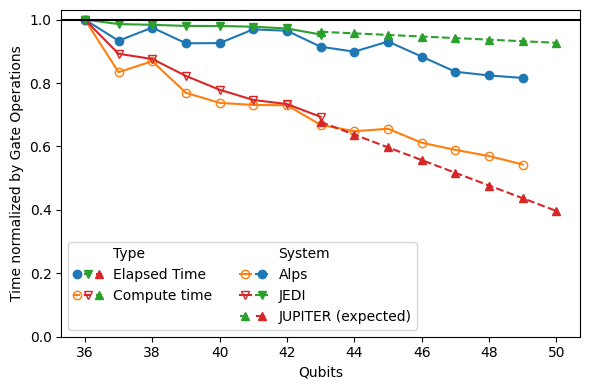

In [38]:
fig, ax = plt.subplots()
for sys in ['Alps', 'JEDI']:
    for quantity in ['Elapsed Time', 'Computation Time']:
        (df_weak_byte.loc[df_weak_byte['System'] == sys, f'{quantity} (norm Gate Ops)/ s'].iloc[0] / df_weak_byte.loc[df_weak_byte['System'] == sys, f'{quantity} (norm Gate Ops)/ s']).plot(label=f'{sys} {quantity}')
#(df_weak_byte.loc[df_weak_byte['System'] == 'Alps', 'Elapsed Time (norm Gate Ops)/ s'].iloc[0] / df_weak_byte.loc[df_weak_byte['System'] == 'Alps', 'Elapsed Time (norm Gate Ops)/ s']).plot(label='Alps Elapsed Time')
#(df_weak_byte.loc[df_weak_byte['System'] == 'JEDI', 'Elapsed Time (norm Gate Ops)/ s'].iloc[0] / df_weak_byte.loc[df_weak_byte['System'] == 'JEDI' ,'Elapsed Time (norm Gate Ops)/ s']).plot(label='JEDI Elapsed Time')
#(df_weak_byte.loc[df_weak_byte['System'] == 'Alps', 'Computation Time (norm Gate Ops)/ s'].iloc[0] / df_weak_byte.loc[df_weak_byte['System'] == 'Alps', 'Computation Time (norm Gate Ops)/ s']).plot(label='Alps Computation Time')
#(df_weak_byte.loc[df_weak_byte['System'] == 'JEDI', 'Computation Time (norm Gate Ops)/ s'].iloc[0] / df_weak_byte.loc[df_weak_byte['System'] == 'JEDI' ,'Computation Time (norm Gate Ops)/ s']).plot(label='JEDI Computation Time')
ax.plot(jupiter_qubits, reg_ctweak.intercept + reg_ctweak.slope * jupiter_qubits, "C2", marker='^', linestyle='dashed', label='JUPITER (expected)')
ax.plot(jupiter_qubits, reg_etweak.intercept + reg_etweak.slope * jupiter_qubits, "C3", marker='^', linestyle='dashed', label='JUPITER (expected)')
for lin in ax.get_lines():
    if 'Alps' in lin.get_label():
        if 'Elapsed' in lin.get_label():
            lin.set_color('C1')
            lin.set_marker('o')
            lin.set_fillstyle('none')
        if 'Comput' in lin.get_label():
            lin.set_color('C0')
            lin.set_marker('o')
    if 'JEDI' in lin.get_label():
        if 'Elapsed' in lin.get_label():
            lin.set_color('C3')
            lin.set_marker('v')
            lin.set_fillstyle('none')
        if 'Comput' in lin.get_label():
            lin.set_color('C2')
            lin.set_marker('v')
ax.axhline(1, color='black')
ax.legend()
ax.set_ylabel('Time normalized by Gate Operations')
type_patch = Patch(color='none', label='Type')
sys_patch = Patch(color='none', label='System')
empty = Patch(color='none', label='empty')
ax.legend(
    [
        type_patch, (ax.get_lines()[1], ax.get_lines()[3], ax.get_lines()[5]), (ax.get_lines()[0], ax.get_lines()[2], ax.get_lines()[4]),
        empty,
        sys_patch, (ax.get_lines()[0], ax.get_lines()[1]), (ax.get_lines()[2], ax.get_lines()[3]), (ax.get_lines()[4], ax.get_lines()[5]),
    ],
    [
        'Type', 'Elapsed Time', 'Compute time', '',
        'System', 'Alps', 'JEDI', 'JUPITER (expected)'
    ],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    ncol=2
)
ax.set_ylim(bottom=0)
my_plot_fig(fig, 'alps-jedi--weak-scale-relative')

In [ ]:
fig, ax = plt.subplots()
ax.axhline(1, color='black')
ax = ((df_weak.index / df_weak.index[0]) / (df_weak['Alps']/df_weak['Alps'].iloc[0])).plot(ax=ax, color='C0', style='o-', label='Alps')
ax = ((df_weak.index / df_weak.index[0]) / (df_weak['JEDI']/df_weak['JEDI'].iloc[0])).plot(ax=ax, color='C1', style='v-', label='JEDI')
ax.set_title('Scaling Efficiency: Runtime relative to 36 Qubit, normalized to Qubit ratio.\nFor example (40 Qubit): 40/36 / runtime(40)/runtime(36)')
ax.set_ylabel('Scaling Efficiency (rel.)')
ax.legend()

## Strong Scaling

### Elpased Time / Compute Time

In [41]:
df_strong = df.loc[(df['Scaling'] == 'Strong') & (df['Precision'] == 'Byte Encoding')].pivot_table(index="MPI Processes", columns="System", values="Elapsed Time / s")

In [42]:
df_strong = df.loc[(df['Scaling'] == 'Strong') & (df['Precision'] == 'Byte Encoding')].copy()
df_strong

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
38              4104              4            144.07                112.89   
38              4112              8             78.16                 56.52   
38              4128             16             42.68                 28.30   
38              4160             32             23.56                 13.79   
38              4224             64             14.75                  7.20   
38              4352            128              8.55                  3.64   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
38                   43          4.89                     960   
38                   43          6.47                     560   
38                   43          5.80                     316   
38                   43          4.38                     175   
38                   43          3.90                      95   
38                   43          2.04                      51   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
38                 22.11                2560              40  Strong   JEDI   
38                 12.09                1408              44  Strong   JEDI   
38                  6.31                 736              46  Strong   JEDI   
38                  3.41                 400              50  Strong   JEDI   
38                  1.84                 216              54  Strong   JEDI   
38                  0.98                 116              58  Strong   JEDI   

            Precision  MPI Bandwidth / GiB/s  \
Qubits                                         
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   

        Elapsed Time per Gate Operation / s  \
Qubits                                        
38                                      NaN   
38                                      NaN   
38                                      NaN   
38                                      NaN   
38                                      NaN   
38                                      NaN   

        Computation Time per Gate Operation / s  
Qubits                                           
38                                          NaN  
38                                          NaN  
38                                          NaN  
38                                          NaN  
38                                          NaN  
38                                          NaN

In [43]:
df_strong['Ideal (Elapsed)'] = df_strong["Elapsed Time / s"].iloc[0]
df_strong['Ideal (Elapsed)'] = df_strong['Ideal (Elapsed)'] / pd.Series(df_strong['MPI Processes']/df_strong['MPI Processes'].iloc[0])
df_strong['Ideal (Computation)'] = df_strong["Computation Time / s"].iloc[0]
df_strong['Ideal (Computation)'] = df_strong['Ideal (Computation)'] / pd.Series(df_strong['MPI Processes']/df_strong['MPI Processes'].iloc[0])
df_strong

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
38              4104              4            144.07                112.89   
38              4112              8             78.16                 56.52   
38              4128             16             42.68                 28.30   
38              4160             32             23.56                 13.79   
38              4224             64             14.75                  7.20   
38              4352            128              8.55                  3.64   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
38                   43          4.89                     960   
38                   43          6.47                     560   
38                   43          5.80                     316   
38                   43          4.38                     175   
38                   43          3.90                      95   
38                   43          2.04                      51   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
38                 22.11                2560              40  Strong   JEDI   
38                 12.09                1408              44  Strong   JEDI   
38                  6.31                 736              46  Strong   JEDI   
38                  3.41                 400              50  Strong   JEDI   
38                  1.84                 216              54  Strong   JEDI   
38                  0.98                 116              58  Strong   JEDI   

            Precision  MPI Bandwidth / GiB/s  \
Qubits                                         
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   

        Elapsed Time per Gate Operation / s  \
Qubits                                        
38                                      NaN   
38                                      NaN   
38                                      NaN   
38                                      NaN   
38                                      NaN   
38                                      NaN   

        Computation Time per Gate Operation / s  Ideal (Elapsed)  \
Qubits                                                             
38                                          NaN       144.070000   
38                                          NaN        72.035000   
38                                          NaN        36.017500   
38                                          NaN        18.008750   
38                                          NaN         9.004375   
38                                          NaN         4.502187   

        Ideal (Computation)  
Qubits                       
38               112.890000  
38                56.445000  
38                28.222500  
38                14.111250  
38                 7.055625  
38                 3.527813

#### Absolute Numbers

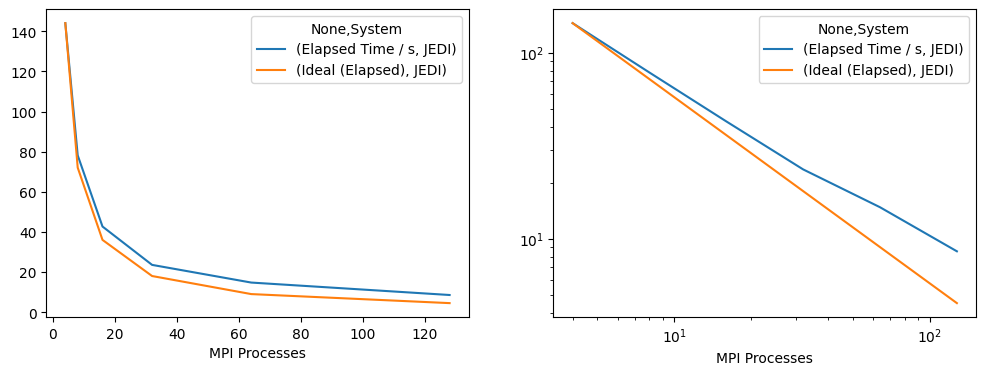

In [44]:
fig, [ax_lin, ax_log] = plt.subplots(ncols=2, figsize=(12,4))
ax_lin = df_strong.pivot_table(index="MPI Processes", columns="System", values=["Elapsed Time / s", 'Ideal (Elapsed)']).plot(ax=ax_lin)
ax_log = df_strong.pivot_table(index="MPI Processes", columns="System", values=["Elapsed Time / s", 'Ideal (Elapsed)']).plot(logy=True, logx=True, ax=ax_log)

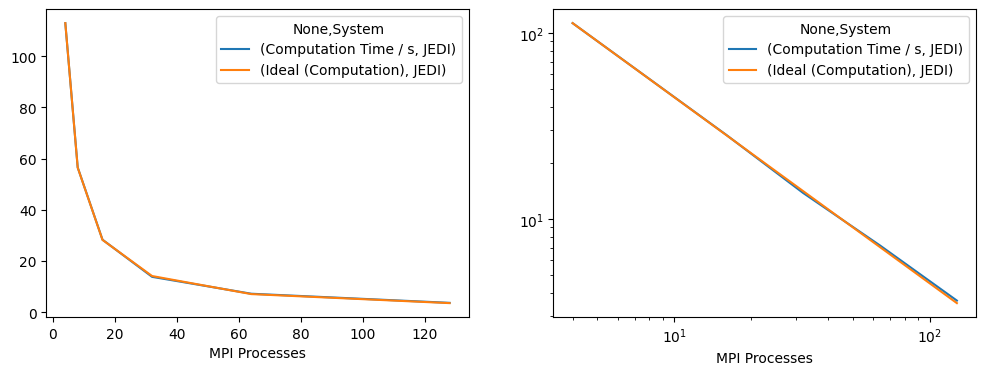

In [45]:
fig, [ax_lin, ax_log] = plt.subplots(ncols=2, figsize=(12,4))
ax_lin = df_strong.pivot_table(index="MPI Processes", columns="System", values=["Computation Time / s", 'Ideal (Computation)']).plot(ax=ax_lin)
ax_log = df_strong.pivot_table(index="MPI Processes", columns="System", values=["Computation Time / s", 'Ideal (Computation)']).plot(logy=True, logx=True, ax=ax_log)

#### Relative Numbers

In [46]:
df_strong['Elapsed Time (rel)'] = df_strong['Ideal (Elapsed)'] / df_strong['Elapsed Time / s']
df_strong['Computation Time (rel)'] = df_strong['Ideal (Computation)'] / df_strong['Computation Time / s']
df_strong.head()

Memory / GiB  MPI Processes  Elapsed Time / s  Computation Time / s  \
Qubits                                                                        
38              4104              4            144.07                112.89   
38              4112              8             78.16                 56.52   
38              4128             16             42.68                 28.30   
38              4160             32             23.56                 13.79   
38              4224             64             14.75                  7.20   

        Gate Operations  MPI time / s  GPU-GPU MPI Data / GiB  \
Qubits                                                          
38                   43          4.89                     960   
38                   43          6.47                     560   
38                   43          5.80                     316   
38                   43          4.38                     175   
38                   43          3.90                      95   

        GPU-CPU Time / s  GPU-CPU Data / GiB   GPU-CPU Count Scaling System  \
Qubits                                                                        
38                 22.11                2560              40  Strong   JEDI   
38                 12.09                1408              44  Strong   JEDI   
38                  6.31                 736              46  Strong   JEDI   
38                  3.41                 400              50  Strong   JEDI   
38                  1.84                 216              54  Strong   JEDI   

            Precision  MPI Bandwidth / GiB/s  \
Qubits                                         
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   
38      Byte Encoding                    NaN   

        Elapsed Time per Gate Operation / s  \
Qubits                                        
38                                      NaN   
38                                      NaN   
38                                      NaN   
38                                      NaN   
38                                      NaN   

        Computation Time per Gate Operation / s  Ideal (Elapsed)  \
Qubits                                                             
38                                          NaN       144.070000   
38                                          NaN        72.035000   
38                                          NaN        36.017500   
38                                          NaN        18.008750   
38                                          NaN         9.004375   

        Ideal (Computation)  Elapsed Time (rel)  Computation Time (rel)  
Qubits                                                                   
38               112.890000            1.000000                1.000000  
38                56.445000            0.921635                0.998673  
38                28.222500            0.843896                0.997261  
38                14.111250            0.764378                1.023296  
38                 7.055625            0.610466                0.979948

In [47]:
ax.get_xticks()

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [48]:
df_strong['MPI Processes']

Qubits
38      4
38      8
38     16
38     32
38     64
38    128
Name: MPI Processes, dtype: int64

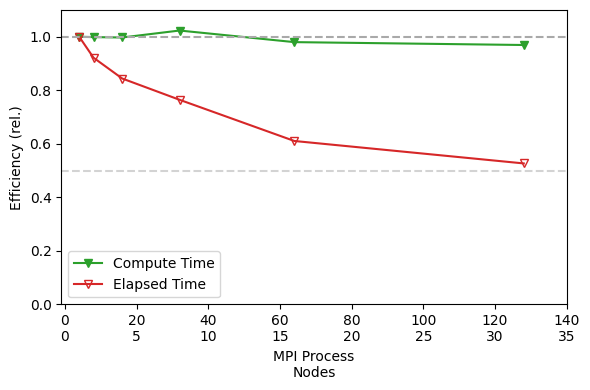

In [50]:
fig, ax_lin = plt.subplots()
ax_lin = df_strong.pivot_table(index="MPI Processes", columns="System", values=['Elapsed Time (rel)', 'Computation Time (rel)']).plot(ax=ax_lin, style=['v-', 'v-'], color=['C2','C3'])
#ax_log = df_strong.pivot_table(index="MPI Processes", columns="System", values=['Elapsed Time (rel)', 'Computation Time (rel)']).plot(logy=True, logx=True, ax=ax_log, style=['*-', '.-'])
for ax in [ax_lin]:
    ax.axhline(1, color='darkgray', linestyle='dashed')
    ax.axhline(0.5, color='lightgray', linestyle='dashed')
    for i, line in enumerate(ax.get_lines()):
        if i % 2:
            line.set_fillstyle('none')
    ax.legend(['Compute Time', 'Elapsed Time'])
    ax.set_ylabel('Efficiency (rel.)')
    ax.set_xlabel('MPI Process\nNodes')
    #ax.set_xticks(df_strong['MPI Processes'])
    ax.set_xticks(ax.get_xticks())
    ax.set_ylim([0,1.1])
    ax.set_xlim([-1,140])
    ax.set_xticklabels(['{mpi}\n{node}'.format(node=int(int(proc.get_position()[0])/4), mpi=int(proc.get_position()[0])) for proc in ax.get_xticklabels()])
my_plot_fig(fig, 'jedi--strong-rel')

### All Timings

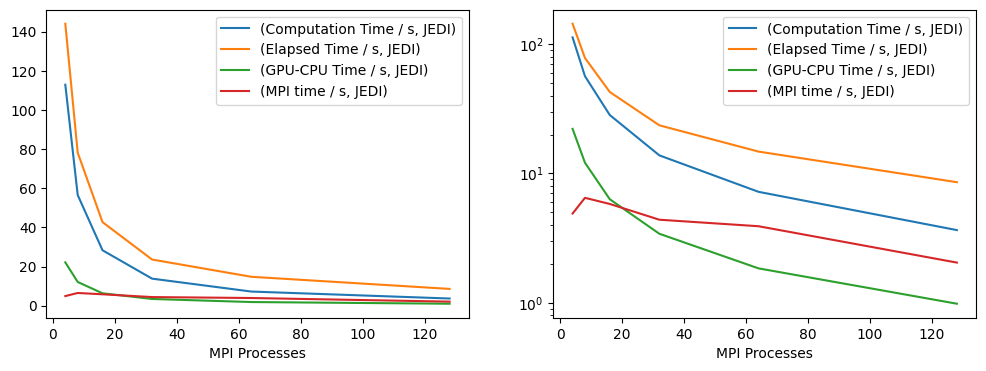

In [51]:
fig, [ax_left, ax_right] = plt.subplots(ncols=2, figsize=(12,4))
#ax = sns.lineplot(df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')], x="Qubits", y="Elapsed Time / s", hue='System')
#sns.lineplot(df.loc[(df['Scaling'] == 'Weak') & (df['Precision'] == 'Byte Encoding')], x="Qubits", y="Computation Time / s", hue='System', ax=ax)
ax_left = df.loc[(df['Scaling'] == 'Strong') & (df['Precision'] == 'Byte Encoding')].pivot_table(index="MPI Processes", columns="System", values=["Elapsed Time / s", "Computation Time / s", "MPI time / s", "GPU-CPU Time / s"]).plot(ax=ax_left)
ax_right = df.loc[(df['Scaling'] == 'Strong') & (df['Precision'] == 'Byte Encoding')].pivot_table(index="MPI Processes", columns="System", values=["Elapsed Time / s", "Computation Time / s", "MPI time / s", "GPU-CPU Time / s"]).plot(logy=True, ax=ax_right)
ax_left.legend(ncols=1)
ax_right.legend(ncols=1)

## Byte vs FP64

In [52]:
df_datatype = df.loc[(df['Scaling'] == 'Weak') & (df['System'] == 'JEDI')].pivot_table(index="Qubits", columns="Precision", values=["Elapsed Time / s", "MPI Processes"])

In [53]:
df_datatype

Elapsed Time / s        MPI Processes       
Precision    Byte Encoding   FP64 Byte Encoding   FP64
Qubits                                                
36                  120.28  49.21           1.0    8.0
37                  138.11  60.02           2.0   16.0
38                  144.05  69.42           4.0   32.0
39                  156.98  77.18           8.0   64.0
40                  169.53  95.05          16.0  128.0
41                  180.76    NaN          32.0    NaN
42                  187.96    NaN          64.0    NaN
43                  203.10    NaN         128.0    NaN

In [54]:
df_compute_time = df_datatype.loc[(slice(None), ('Elapsed Time / s'))] * df_datatype.loc[(slice(None), ('MPI Processes'))]  # the product of elapsed time and mpi processes
df_compute_time

Precision  Byte Encoding      FP64
Qubits                            
36                120.28    393.68
37                276.22    960.32
38                576.20   2221.44
39               1255.84   4939.52
40               2712.48  12166.40
41               5784.32       NaN
42              12029.44       NaN
43              25996.80       NaN

<Axes: xlabel='Qubits'>

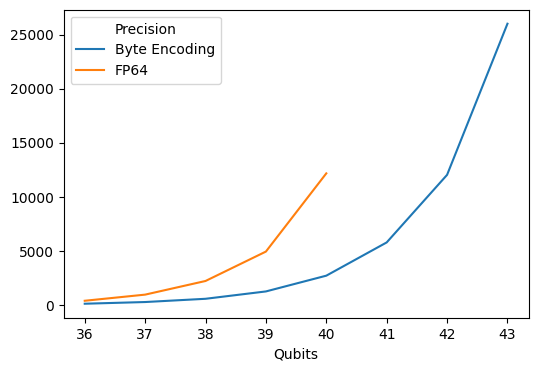

In [55]:
df_compute_time.plot()

## TINKERNIG

### Weak Scaling Extrapolation

In [ ]:
jedi_fit = linregress(df_weak['JEDI'].index[0:8], df_weak['JEDI'].values[0:8])
alps_fit = linregress(df_weak['Alps'].index, df_weak['Alps'].values)

In [ ]:
print(jedi_fit)

In [57]:
jupiter_qubits = np.array([43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
fig, ax = plt.subplots()
ax = df_weak.plot(style=['o','v'], linestyle='solid', ax=ax)
ax.plot(jupiter_qubits, jedi_fit.intercept + jedi_fit.slope * jupiter_qubits, "C1", marker='^', linestyle='dashed', label='JUPITER (expected)')
ax.set_ylabel('Elapsed Time/s')
ax.legend()
my_plot_fig(fig, 'alps-jedi--weak--byte--elapsed-time')

### Weak Scaling Efficiency

In [131]:
df_weak['Alps'] / df_weak.index

Qubits
36    3.327778
37    3.976216
38    3.806053
39    4.286923
40    4.457500
41    4.485854
42    4.480714
43    4.883023
44    5.022045
45    4.952000
46    5.295870
47    5.487234
dtype: float64

In [132]:
df_weak['JEDI'] / df_weak.index

Qubits
36    3.341111
37    3.732703
38    3.790789
39    4.025128
40    4.238250
41    4.408780
42    4.475238
43    4.723256
44         NaN
45         NaN
46         NaN
47         NaN
dtype: float64

In [133]:
df_weak

System    Alps    JEDI
Qubits                
36      119.80  120.28
37      147.12  138.11
38      144.63  144.05
39      167.19  156.98
40      178.30  169.53
41      183.92  180.76
42      188.19  187.96
43      209.97  203.10
44      220.97     NaN
45      222.84     NaN
46      243.61     NaN
47      257.90     NaN

In [142]:
df_weak.index / df_weak.index[0]

Index([               1.0, 1.0277777777777777, 1.0555555555555556,
       1.0833333333333333, 1.1111111111111112, 1.1388888888888888,
       1.1666666666666667, 1.1944444444444444, 1.2222222222222223,
                     1.25, 1.2777777777777777, 1.3055555555555556],
      dtype='float64', name='Qubits')

In [145]:
df_weak/df_weak.iloc[0]

System      Alps      JEDI
Qubits                    
36      1.000000  1.000000
37      1.228047  1.148237
38      1.207262  1.197622
39      1.395576  1.305121
40      1.488314  1.409461
41      1.535225  1.502827
42      1.570868  1.562687
43      1.752671  1.688560
44      1.844491       NaN
45      1.860100       NaN
46      2.033472       NaN
47      2.152755       NaN

In [152]:
((df_weak.index / df_weak.index[0]) / (df_weak['Alps']/df_weak['Alps'].iloc[0]))

Qubits
36    1.000000
37    0.836921
38    0.874338
39    0.776263
40    0.746557
41    0.741838
42    0.742689
43    0.681499
44    0.662634
45    0.672007
46    0.628372
47    0.606458
dtype: float64

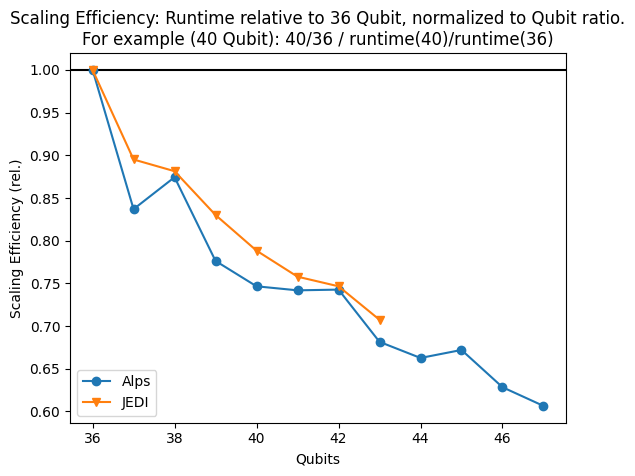

In [170]:
fig, ax = plt.subplots()
ax.axhline(1, color='black')
ax = ((df_weak.index / df_weak.index[0]) / (df_weak['Alps']/df_weak['Alps'].iloc[0])).plot(ax=ax, color='C0', style='o-', label='Alps')
ax = ((df_weak.index / df_weak.index[0]) / (df_weak['JEDI']/df_weak['JEDI'].iloc[0])).plot(ax=ax, color='C1', style='v-', label='JEDI')
ax.set_title('Scaling Efficiency: Runtime relative to 36 Qubit, normalized to Qubit ratio.\nFor example (40 Qubit): 40/36 / runtime(40)/runtime(36)')
ax.set_ylabel('Scaling Efficiency (rel.)')
ax.legend()

In [263]:
#fig, ax = plt.subplots()
#ax.axhline(1, color='black')
#ax = ((np.pow(2, df_weak.index) / np.pow(2, df_weak.index[0])) / (df_weak['Alps']/df_weak['Alps'].iloc[0])).plot(ax=ax, color='C0', style='o-', label='Alps', logy=True)
#ax = ((np.pow(2, df_weak.index) / np.pow(2, df_weak.index[0])) / (df_weak['JEDI']/df_weak['JEDI'].iloc[0])).plot(ax=ax, color='C1', style='v-', label='JEDI', logy=True)
#ax.set_title('Scaling Efficiency: Runtime relative to 36 Qubit, normalized to Qubit-square ratio.\nFor example (40 Qubit): 2^40/2^36 / runtime(40)/runtime(36)')
#ax.set_ylabel('Scaling Efficiency (rel.)')
#ax.legend()

---